In [ ]:
pip install requests
pip install beautifulsoup4

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = "https://www.airbnb.co.in/s/New-Delhi--India/homes?place_id=ChIJLbZ-NFv9DDkRzk0gTkm3wlI&refinement_paths%5B%5D=%2Fhomes"
web = requests.get(url)
print(web)

<Response [200]>


In [5]:
import re

name_list = []
price_list = []
reviews_list = []
desc_list = []

if web.status_code == 200:
    while True:
        soup = BeautifulSoup(web.text, "lxml")
        
        # Extract all listings
        listings = soup.find_all("div", {"class": "cy5jw6o"})

        for listing in listings:
            # Extract name
            name = listing.find("div", {"class": "t1jojoys"})
            name_list.append(name.text if name else None)

            # Extract price
            # price = listing.find("div", {"class": "pquyp1l"})
            # price_list.append(price.text.split()[0]  if price else None)


            price = listing.find("div", {"class": "pquyp1l"})
            if price:
              text = price.get_text().replace('Show', '').strip()  # Remove "Show" and extra spaces
              match = re.search(r'\d+', text.replace(',', ''))  # Remove commas and extract digits
              clean_price = match.group() if match else None
              price_list.append(clean_price)
            else:
              price_list.append(None)
       

            # Extract reviews
            # reviews = listing.find("span", {"aria-hidden": "true"})
            reviews = listing.find("span", {"class": "r4a59j5"})
            reviews_list.append(reviews.text.split()[0]  if reviews else None)
           

            
            # Extract description
            desc = listing.find("div", {"class": "fb4nyux"})
            # desc = listing.find_all("span", {"aria-label": "fb4nyux"})
            desc_list.append(desc.text if desc else None)

        # Find next page
        next_page = soup.find("a", {"aria-label": "Next"})
        if not next_page:
            print("No more pages.")
            break
        
        new_page = next_page.get("href")
        if not new_page:
            break
        
        complete_new_page = "https://www.airbnb.co.in" + new_page
        
        web = requests.get(complete_new_page)
        if web.status_code != 200:
            print(f"Failed to retrieve page: {web.status_code}")
            break
else:
    print(f"Failed to retrieve page: {web.status_code}")



No more pages.


In [7]:
df = pd.DataFrame({
    "Name": name_list,
    "Price": price_list,
    "Reviews": reviews_list,
    "Description": desc_list
})

print(df)

                           Name  Price Reviews  \
0        Room in Defence Colony   2967    4.96   
1           Flat in Mahipal Pur   2624     4.9   
2    Room in Greater Kailash II   1940    4.93   
3     Flat in Greater Kailash I   2910    4.97   
4             Room in Hauz Khas   2978    4.79   
..                          ...    ...     ...   
265      Apartment in New Delhi  22420    4.87   
266           Room in New Delhi  19394    4.96   
267      Apartment in New Delhi  49869    4.89   
268           Room in New Delhi  21450    4.97   
269      Apartment in New Delhi  21494    4.95   

                                           Description  
0    Stay with NeelamStay with NeelamSelf employed,...  
1          Spacious living room with Balcony & Bedroom  
2    Stay with JayStay with JayInformation technolo...  
3               The penthouse in the heart of Delhi GK  
4    Stay with SwaranStay with SwaranHospitality,  ...  
..                                                 ...  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         270 non-null    object
 1   Price        270 non-null    object
 2   Reviews      268 non-null    object
 3   Description  270 non-null    object
dtypes: object(4)
memory usage: 8.6+ KB


In [11]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [13]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         270 non-null    object 
 1   Price        270 non-null    int64  
 2   Reviews      256 non-null    float64
 3   Description  270 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ KB


In [17]:
df

,Name,Price,Reviews,Description
0,Room in Defence Colony,2967,4.96,"Stay with NeelamStay with NeelamSelf employed,..."
1,Flat in Mahipal Pur,2624,4.90,Spacious living room with Balcony & Bedroom
2,Room in Greater Kailash II,1940,4.93,Stay with JayStay with JayInformation technolo...
3,Flat in Greater Kailash I,2910,4.97,The penthouse in the heart of Delhi GK
4,Room in Hauz Khas,2978,4.79,"Stay with SwaranStay with SwaranHospitality, ..."
...,...,...,...,...
265,Apartment in New Delhi,22420,4.87,Spacious 1BHK Suite Prime Location w/ 2 baths ...
266,Room in New Delhi,19394,4.96,Stay with IshanStay with IshanF&b | hospitalit...
267,Apartment in New Delhi,49869,4.89,Luxurious Private Penthouse with Terrace Garden
268,Room in New Delhi,21450,4.97,Stay with NitinStay with NitinQuality assuranc...


In [19]:
print(df.describe())

              Price     Reviews
count    270.000000  256.000000
mean   12883.629630    4.886875
std    10946.462042    0.096765
min     1126.000000    4.460000
25%     3218.250000    4.830000
50%    10344.500000    4.900000
75%    19394.000000    4.962500
max    52717.000000    5.000000


In [21]:
print(df.isnull().sum())

Name            0
Price           0
Reviews        14
Description     0
dtype: int64


In [23]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


In [25]:
print(df['Name'].nunique())

36


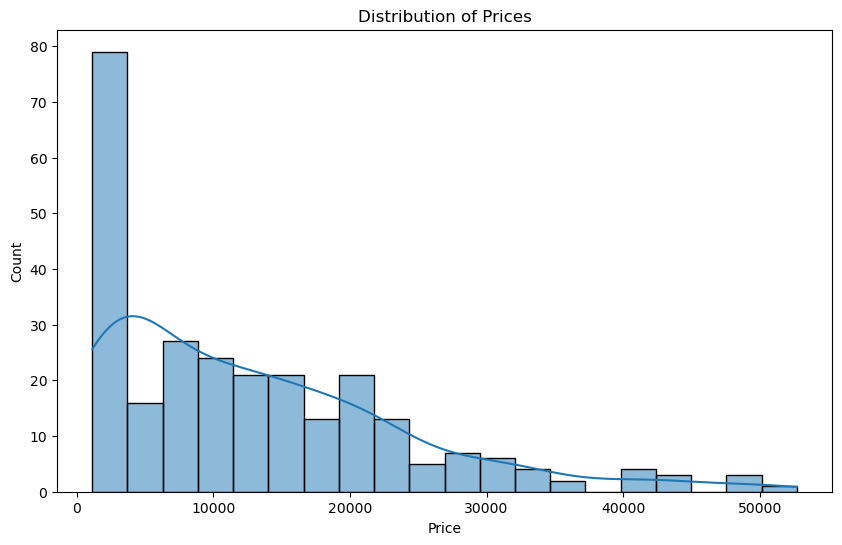

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.show()


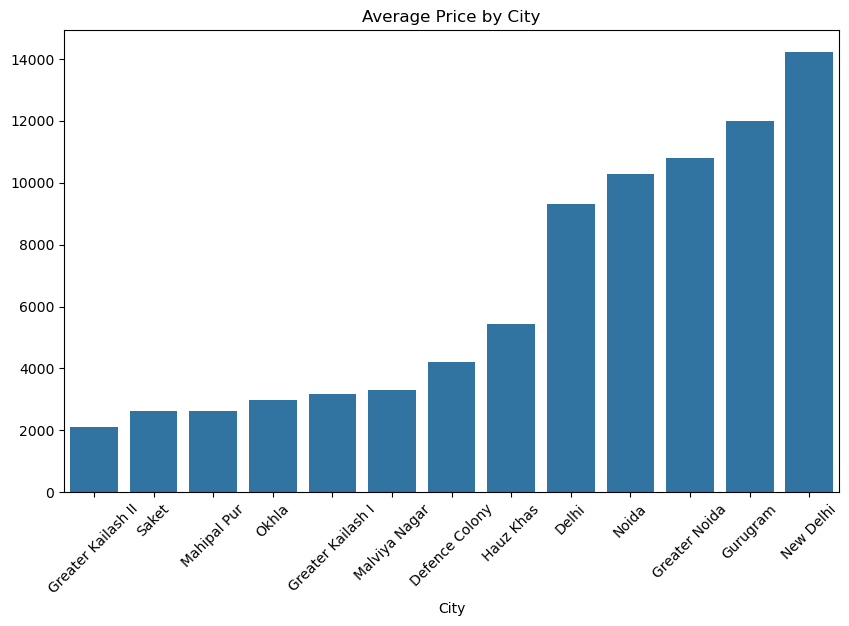

In [29]:
df['City'] = df['Name'].str.extract(r'in (.+)')
city_avg_price = df.groupby('City')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_avg_price.index, y=city_avg_price.values)
plt.title('Average Price by City')
plt.xticks(rotation=45)
plt.show()


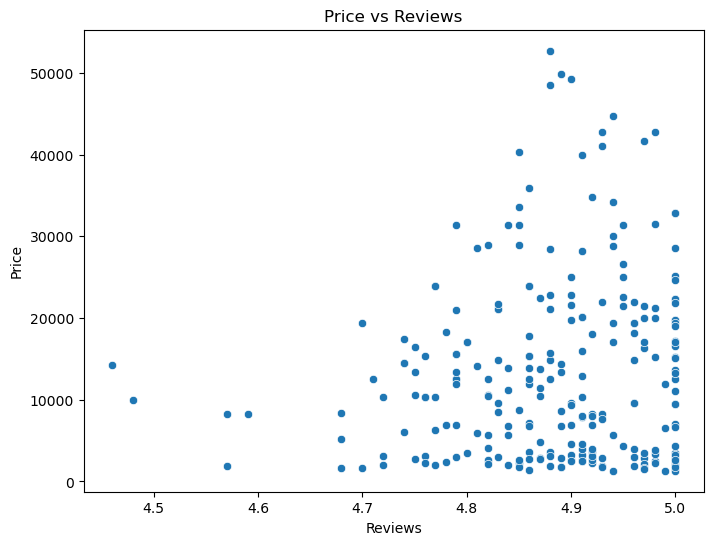

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Reviews', y='Price', data=df)
plt.title('Price vs Reviews')
plt.show()


In [33]:
top_expensive = df.nlargest(5, 'Price')
print(top_expensive[['Name', 'Price', 'City']])


                       Name  Price       City
132       Flat in New Delhi  52717  New Delhi
267  Apartment in New Delhi  49869  New Delhi
179       Flat in New Delhi  49215  New Delhi
139       Flat in New Delhi  48500  New Delhi
37   Apartment in New Delhi  44744  New Delhi


            Price   Reviews
Price    1.000000  0.072285
Reviews  0.072285  1.000000


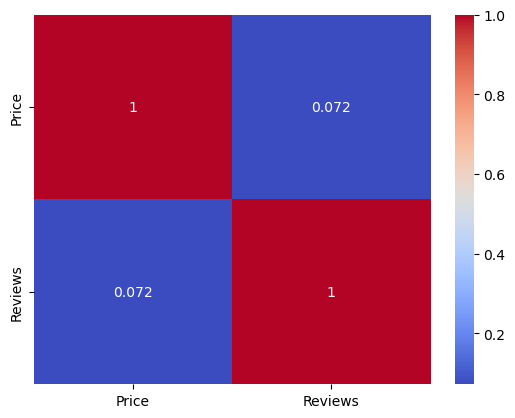

In [35]:
correlation = df[['Price', 'Reviews']].corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()


In [37]:
top_rated = df.nlargest(5, 'Reviews')
print(top_rated[['Name', 'Reviews', 'Price']])


                          Name  Reviews  Price
7   Apartment in Malviya Nagar      5.0   3311
16               Room in Saket      5.0   3053
18            Flat in Gurugram      5.0  19799
20      Tiny home in New Delhi      5.0  17232
21            Flat in Gurugram      5.0  25163


In [39]:
df.to_csv("airbnb.csv")
